# Background 

Inspired by: 
- [Andrej Karpathy](https://youtu.be/kCc8FmEb1nY) Fully his code, his ideas, his content 
- https://arxiv.org/abs/1706.03762
- https://github.com/karpathy/nanoGPT



> Instead of training on a slice of the internet (\~30 trillion words), training on my notes (\~1 million words)
> Production-grade system
> A lot of pre-training and fine-tuning stages 

*Aim: train transformer based language model, character based*
*Bolster understanding of ChatGPT 'under the hood'*
*Revise data science fundamentals*

# Motivation

As data scientists, we often encounter structured datasets, orderly and predictable in nature. But human experiences, emotions, and memories aren't always so neatly organized. My dataset, a digital diary of my memories and thoughts, exemplifies this. It's a unique mosaic of memory hoarding OCD, inflected with spiritual and religious nuances. What began as a conventional diary, recounting daily events, evolved into a complex tapestry of fragmented words and phrases. These entries sometimes hold immense personal significance, while at other times, they're just fleeting snapshots of my psyche.

This dataset is erratic and disjointed. It's a chronicle of thoughts that range from the tangible to the abstract, from coherent narratives to mere representations of bright flashes of ideas. Over time, the nature of my notes has changed, with earlier entries offering clear recounts and later ones becoming increasingly abstract. Amidst this chaos, there are unexpected gems - raw emotions, the euphoria of meeting my girlfriend, or even mundane details like Instagram URLs and gift ideas.

The challenge and motivation behind training an LLM on this dataset is multifaceted:

1. **Understanding the Abstract**: Can the model decode the complexity and transform the intangible into something more tangible? Can it make sense of a dataset that is, by its very nature, non-sensical?
2. **Mapping the Mental Landscape**: This dataset provides an opportunity to explore the architecture of my mind. It's a chance to visualize the evolution of my thoughts, even if they manifest randomly.
3. **Clearing the Cache**: Just as a computer's performance can degrade when the CPU is constantly at 100%, the incessant flow of thoughts can be overwhelming. By processing this data, I aim to metaphorically clear the cache, offering a fresh perspective on old memories and perhaps, in the process, alleviate the persistent feeling of forgetfulness.

In essence, this project isn't just an exploration of data but a deep dive into the human psyche. Through the lens of data science and machine learning, I hope to gain insights into the intricate web of thoughts and memories that constitute my identity.

In [131]:
class MemoryHoardingOCD:
    # But WHAT IS memory hoarding OCD? A Pythonic representation:
    """
    This class represents Memory Hoarding OCD, a subset of Obsessive-Compulsive Disorder (OCD)
    where individuals excessively collect or "hoard" memories, often out of a fear of losing 
    or forgetting important information.
    """

    def __init__(self):
        # The bank to store hoarded memories
        self.memory_bank = []

        # The fear associated with losing or forgetting memories
        self.fear = "losing or forgetting"

        # A strong need for control over their thoughts
        self.need_for_control = True

    def hoard_memory(self, memory):
        """
        This function represents the process of collecting and storing memories in 
        an attempt to keep track of every detail, reflecting the hoarding characteristic 
        of the disorder.
        """
        self.memory_bank.append(memory)
        self.review_memory()

    def review_memory(self):
        """
        Individuals with Memory Hoarding OCD continuously review their memories, 
        leading to significant distress. This function represents that review process.
        """
        for memory in self.memory_bank:
            print(f"Rehearsing: {memory} ...")
        
        # The distress brought by constant reviewing
        if len(self.memory_bank) > 10:
            print("Distress intensifying. Too many memories to manage...")

    def avoid_new_memory(self, situation):
        """
        This function represents the avoidance behaviour, which is a common characteristic of OCD. 
        Individuals with Memory Hoarding OCD might avoid situations that might generate new, 
        difficult-to-manage memories.
        """
        print(f"Avoiding {situation} to not generate new, difficult-to-manage memories.")

# Instance of the MemoryHoardingOCD class
memory_HOCD = MemoryHoardingOCD()

# An unlimited loop for adding new memories until user enters 'quit'
while True:
    memory = input("Input a new thought / memory: ")
    if memory == "quit":
        break
    memory_HOCD.hoard_memory(memory)
    memory_HOCD.avoid_new_memory("situations")


Input a new thought / memory:  quit


Given a chunk of characters, some context, the transformer (neural network) will digest the characters, and try to predict the next ones. 

Will model how these characters (thoughts) follow each other 

If I can't predict the trends... What are the tokens of thoughts. Could be introspective  

Ideally, once trained, we can generate $\infty$ thoughts in writing, so that I don't need to? Many Questions

---

# Dataset

In [132]:
# THE DATASET [collapsed]
'''Since my notes are written everywhere... compulsively
Must 'crawl': Instagram DM's, Reminders, Notes, Handwritten'''

"Since my notes are written everywhere... compulsively\nMust 'crawl': Instagram DM's, Reminders, Notes, Handwritten"

In [133]:
 with open('all_thoughts.txt', 'r', encoding='utf-8') as f:
        text = f.read()
        
# Not mandatory, just defining my signature horizontal line divider
line_div = "+>=====================================<+"

In [134]:
print("Length of dataset in characters: ", len(text))

Length of dataset in characters:  419153


In [135]:
# Let's see the first 1000 characters
print(text[:100])

get to learn and be thorough
Try Grow. anddddddddddd mew. 
the dream about uhhhhh: so many dreams 
o


In [136]:
# All the unique characters that occur in this text 
chars = sorted(list(set(text))) # Arbitrary sorting
vocab_size = len(chars) # Possible element of sequences 
print(''.join(chars))
print(vocab_size)

	
 !#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_abcdefghijklmnopqrstuvwxyz{|}~ ¥é‍—‘’“”… 
⁃€⏰━♂〰윤임찬️🐚👂👍👏💃🔒😁😔🥳🧎🪟🫀🫁
129


---

# Tokenisation
> Tokenisation: convert the raw string text, to some sequence of integers according to some vocabulary of possible elements. 
- Since this is character-level, each character will be represented by some integer# Develop tokenisation strategy

In [137]:
# Create mapping from characters to integers
stoi = { ch:i for i, ch in enumerate(chars)}
itos = { i:ch for i, ch in enumerate(chars)}

# Encode/Decode
encode = lambda s: [stoi[c] for c in s] # String -> List of Integers
decode = lambda l: ''.join([itos[i] for i in l]) # List of Integers -> String

print(encode("Memory Hoarding OCD"))
print(decode(encode("Memory Hoarding OCD")))

[46, 69, 77, 79, 82, 89, 2, 41, 79, 65, 82, 68, 73, 78, 71, 2, 48, 36, 37]
Memory Hoarding OCD


---

*Like a translation from string to integers, one a character level
This is one of many tokenisation methods, one of the most simple.*

**As an aside, let's see how ChatGPT's tokeniser works...**

In [138]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
enc.n_vocab
print(enc.encode("Memory Hoarding OCD"))
print(enc.decode([30871, 9544, 13493, 43699]))

[30871, 9544, 13493, 43699]
Memory Hoarding OCD


Tradeoff between **sequence length** and **vocabulary size**

Before we start, `tensors`:

> A great introduction to Tensors in ML from Minsuk Heo: https://youtu.be/tIqoI4jGE-w

---

In [139]:
# Let's now encode all of my thoughts and store in a torch.Tensor
import torch 
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:100]) # This is what my thoughts look like to the GPT

torch.Size([419153]) torch.int64
tensor([71, 69, 84,  2, 84, 79,  2, 76, 69, 65, 82, 78,  2, 65, 78, 68,  2, 66,
        69,  2, 84, 72, 79, 82, 79, 85, 71, 72,  1, 53, 82, 89,  2, 40, 82, 79,
        87, 15,  2, 65, 78, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68,  2, 77,
        69, 87, 15,  2,  1, 84, 72, 69,  2, 68, 82, 69, 65, 77,  2, 65, 66, 79,
        85, 84,  2, 85, 72, 72, 72, 72, 72, 27,  2, 83, 79,  2, 77, 65, 78, 89,
         2, 68, 82, 69, 65, 77, 83,  2,  1, 79])


In [140]:
# Now, split up the data into train and validation sets
n = int(0.9*len(data)) # 90 : 10 split, train/val
train_data = data[:n]
valid_data = data[n:]

Helps us understand to what extend model is overfitting. 
We don't want the model to memorise and replicate thoughts exactly. 

---

# Data Loader

- We're going to start plugging the text sequences into the transformer so that it can train, recognise and learn. 
- We're not going to feed the transformer my entire consciousness all at once, this would be too **computationally** (and existentially) expensive. 
- Instead, we are going to train on smaller, sampled chunks
- The length of these chunks is typically called `block_size`

In [141]:
block_size = 8
train_data[:block_size+1] # +1  because

tensor([71, 69, 84,  2, 84, 79,  2, 76, 69])

- The first nine characters in the sequence
- This chunk has multiple examples within it; it has multiple instances of one character following another character (in sequence)
- The transformer is going to be trained simeltaneously at every position. In a chunk of 9 characters, there are 8 sequence instances. 
> - E.g: Given character `71`, `69` is likely to come next
> - Given character `69`, `84` is likely to come next
> - etc etc...

In [142]:
# This concept visualised...
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"When input is: {context} the target is: {target}")

When input is: tensor([71]) the target is: 69
When input is: tensor([71, 69]) the target is: 84
When input is: tensor([71, 69, 84]) the target is: 2
When input is: tensor([71, 69, 84,  2]) the target is: 84
When input is: tensor([71, 69, 84,  2, 84]) the target is: 79
When input is: tensor([71, 69, 84,  2, 84, 79]) the target is: 2
When input is: tensor([71, 69, 84,  2, 84, 79,  2]) the target is: 76
When input is: tensor([71, 69, 84,  2, 84, 79,  2, 76]) the target is: 69


*Note that we train on all 8 examples with context from 1 to 8. 
- Not done just for computational efficiency but:
- In order to train the transformer on all permutations of the sequence; make it used to seeing everything inbetween
- Will be used later, in inference, where generation can be started with only 1 character as context
    - It would then predict all the way up to `block_size`
    - After this length, we have to start truncating, 
    - Since the transformer will never more than `block_size` inputs when predicting the next character
    
--- 

We've now seen time dimension of tensors being fed to transformers.
- Must also consider **'batch' dimension**
- When sampling chunks of text, we're going to have many batches of multiple chunks of text, stacked up in a single Tensor
- This is done for effiency, since GPU's are good at parallel processing of data
- These chunks are processed independently

In [143]:
torch.manual_seed(2904) # For random number generator
batch_size = 4 # Independent sequences to be processed in parallel (every forward backward pass)
block_size = 8 # Maximum content length for predictions

def get_batch(split):
    # Generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else valid_data
    ix = torch.randint(len(data) - block_size, (batch_size, ))
    # Stack one-dimensional tensors
    x = torch.stack([data[i:i+block_size] for i in ix]) 
    # Contain the 'answer' for the transformer, provide loss function
    y = torch.stack([data[i+1:i+block_size+1] for i in ix]) 
    return x, y
                       
xb, yb = get_batch('train')
print('Inputs: ')
print(xb.shape)
print(xb)
print('\nTargets: (Note the 1 offset)')
print(yb.shape)
print(yb)
print()
print(line_div)

# Let's see inside tensors X and Y
for b in range(batch_size):       # Batch dimension
    for t in range(block_size):   # Time dimension
        context = xb[b, :t+1]
        target = yb[b, t]
        print(f"When input is: {context.tolist()} the target is: {target}")

Inputs: 
torch.Size([4, 8])
tensor([[ 2, 15,  2, 40, 69, 84,  2, 84],
        [15,  2, 46, 69, 87, 15,  2, 52],
        [79, 77, 16, 86, 73, 69, 87, 64],
        [73,  2, 84, 79, 79, 15,  2, 53]])

Targets: (Note the 1 offset)
torch.Size([4, 8])
tensor([[15,  2, 40, 69, 84,  2, 84, 79],
        [ 2, 46, 69, 87, 15,  2, 52, 84],
        [77, 16, 86, 73, 69, 87, 64, 86],
        [ 2, 84, 79, 79, 15,  2, 53, 58]])

+>=====================================<+
When input is: [2] the target is: 15
When input is: [2, 15] the target is: 2
When input is: [2, 15, 2] the target is: 40
When input is: [2, 15, 2, 40] the target is: 69
When input is: [2, 15, 2, 40, 69] the target is: 84
When input is: [2, 15, 2, 40, 69, 84] the target is: 2
When input is: [2, 15, 2, 40, 69, 84, 2] the target is: 84
When input is: [2, 15, 2, 40, 69, 84, 2, 84] the target is: 79
When input is: [15] the target is: 2
When input is: [15, 2] the target is: 46
When input is: [15, 2, 46] the target is: 69
When input is: [15, 2

# Neural Network

- We are going to begin with the most fundamental neural network, the **`Bigram language model`**
> The bigram language model is a type of probabilistic language model that predicts the next word in a text based on the previous word only, effectively considering the text as a sequence of word pairs.

In [144]:
# Our input to the transformer, will be fed into Neural Network: 
print(line_div)
print(xb)
print(line_div)

+>=====================================<+
tensor([[ 2, 15,  2, 40, 69, 84,  2, 84],
        [15,  2, 46, 69, 87, 15,  2, 52],
        [79, 77, 16, 86, 73, 69, 87, 64],
        [73,  2, 84, 79, 79, 15,  2, 53]])
+>=====================================<+


In [156]:
# Python bigram implementation
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(2904)

# Define a BigramLanguageModel as a subclass of PyTorch's nn.Module
class BigramLanguageModel(nn.Module):
    
    # Initialize the class with vocab_size (the total number of unique words in your dataset) as an argument
    def __init__(self, vocab_size):
        super().__init__()  # Call the parent class's (nn.Module's) initializer

        # Create an embedding table with vocab_size rows and columns.
        # This table will be used to look up the logits (unnormalized log probabilities) for the next token (word)
        # given the current token.
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)
        
    # The forward function that will be called when we process inputs through our model
    def forward(self, idx, targets = None):
        # idx and targets are both tensors of shape (B, T) where B is batch size and T is sequence length
        # (number of tokens in each input sequence)

        # Look up the logits for each token in idx using the embedding table, resulting in a tensor of shape (B, T, C),
        # where C is the vocab size (number of classes)
        logits = self.token_embedding_table(idx)
        
        if targets is None:
            loss = None
        else:
        
            B, T, C = logits.shape 
            logits = logits.view(B*T, C) # Preserve channel, 2D
            targets = targets.view(B*T) # Stretch out to 1D
            # A good way to measure loss/quality of predictions is:
            loss = F.cross_entropy(logits, targets)
        
        # Return the logits which can then be used to compute the loss for training or used for making predictions
        # Generates predictions/scores/logits for every one of 4x8 positions
        return logits, loss
    
    # We've evaluated the model on the data, now let's generate
    # This function essentially extends (B, T) -> (B, T+1) etc...
    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # Forward pass the current context through the model to get the output logits and loss
            logits, loss = self(idx)
            # We're only interested in the logits for the last token in the sequence, 
            # as we'll be appending our new token to the end
            logits = logits[:, -1, :] # (B, C)
            # Apply softmax to convert the logits to probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # Sample a new token from the probability distribution for each sequence in the batch
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # Append the new token to the end of the current context
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx
            

# Instantiate the model with a specific vocabulary size
m = BigramLanguageModel(vocab_size)

# Forward pass some inputs (xb) and targets (yb) through the model to get the output logits
logits, loss = m(xb, yb) 

print("Shape:", logits.shape)
print("Loss:", loss)

# GENERATES TEXT    |     idx = (1,1) tensor of zero's     |    asks for 100 tokens   |   unpluck
print(decode(m.generate(torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))

Shape: torch.Size([256, 129])
Loss: tensor(5.2490, grad_fn=<NllLossBackward0>)
	;aOO*=V,4a€\ 
*Ay<iM+“@d찬BUO🫀%€um5a6😔m=nX⏰️5I4…u🧎임{y$^$qvi🧎👂⏰c{y “N—H3—'️dY‍Ly️😁a€🫁A🐚78O찬—~⏰=*🧎jwQUc.


### So what is actually going on here? (in Layman's terms)
Garbage, model untrained. 
Supposed to be general. Building up this context
to make prediction about 'P', only needs to know the letter before
Only looks at very last piece (bigram)
Would like to keep as bigram, for later when we look further down the string, using history. 

print("\n" + line_div + "\n")
print("A logit, in the context of machine learning, is the raw output of a model's prediction before being passed through a normalization function, such as the softmax function, which converts these values into probabilities. We are predicting what comes next based on the individual identity of a single token.")
individual
# We can estimate what the loss should be
expected_loss = -log(1/110)
print(expected_loss)

# Train the Model

In [157]:
'''
Create PyTorch optimiser
Stochastic Gradient Descent = SGD
AdamW = more advanced, optimised
lr = learning rate
'''
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

# Increase from 4
batch_size = 32

# Typical training loop
for steps in range(100000):
    # Sample a batch of data
    xb, yb = get_batch('train')
    
    # Evaluate the loss
    logits, loss = m(xb, yb)
    # Zero-out gradients from previous step
    optimizer.zero_grad(set_to_none=True)
    # Get gradients from previous parameters
    loss.backward()
    # Use gradients to update parameters
    optimizer.step()
    if steps % 5000 == 0:
        print(f"Loss at step {steps:<5} = {loss.item()}")

Loss at step 0     = 5.2606425285339355
Loss at step 5000  = 2.8139243125915527
Loss at step 10000 = 2.5459952354431152
Loss at step 15000 = 2.6847891807556152
Loss at step 20000 = 2.618548631668091
Loss at step 25000 = 2.607581377029419
Loss at step 30000 = 2.7915594577789307
Loss at step 35000 = 2.6311264038085938
Loss at step 40000 = 2.7146308422088623
Loss at step 45000 = 2.7556068897247314
Loss at step 50000 = 2.6756060123443604
Loss at step 55000 = 2.6099538803100586
Loss at step 60000 = 2.5353879928588867
Loss at step 65000 = 2.6277284622192383
Loss at step 70000 = 2.6761248111724854
Loss at step 75000 = 2.5475010871887207
Loss at step 80000 = 2.6992759704589844
Loss at step 85000 = 2.6361122131347656
Loss at step 90000 = 2.690901279449463
Loss at step 95000 = 2.6418774127960205


In [158]:
print(decode(m.generate(torch.zeros((1, 1), dtype=torch.long), max_new_tokens=200)[0].tolist()))

	⁃	⁃	Ang shalinonacurky R*
Jeike ALithem poond wasound bie’tacpo sf Umildeewarshonurve far haver go w’s joge ur Re An. FOO hacuct’sare
‘douso
He t’ssg a 
NOL t d br handime. MU. bangh ONorunthed berenc


> Aside: *It's beautiful. It's like... learning. To me, the user, reading this feels like maybeif you were to peer into my brain during a stroke - somewhat fragmented, nonsensical, but fundamenally THERE. Without even knowing what the repeated and common words I express in writing are, I can see them... somehow sense them in the jumble. 
Of course, only I, the author, can comprehend this particular feeling, but that alone is okay. It's... generating* 

- This is a very basic model. The token's are completely independent and not talking to one another (the model only generates upon the very last character. 
- We shall now kick off the transformer exploration, where this pitfall will be resolved as we allow the model to take in more context, beyond just the final character.
- We are almost ready to make our first self-attention block...

# A mathematical trick in self-attention

In [152]:
# Consider the following toy example:

torch.manual_seed(2409)
B, T, C = 4, 8, 2 # Batch, Time, Channels
x = torch.randn(B, T, C)
x.shape

torch.Size([4, 8, 2])

We would like the batches to talk to each other, couple them
E.g: Token at 5th location should not communicate with tokens in 6th, 7th...
but 4th, 3trd, 2nd, 1st.
Information only flows from previous context to current timestep, can't get info from future

Easiest way for tokens to communicate with past:
Do an average of all preceding elements:
- If 5th token, take channels from current but also 4, 3, 2, 1
- Would become a feature vector that summarises *me in the context of my history*
- Just doing a sum/average is extremely weak form of interaction
- Lost lots of information about spatial arrangement of tokens

xBOW = x-bag-of-words
https://www.clasher.us/images/coc/units/XBow3.png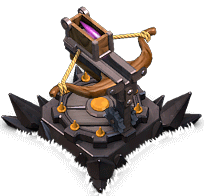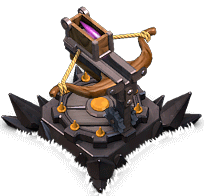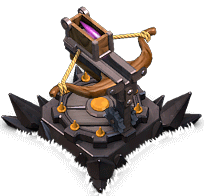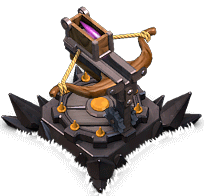

In [198]:
import time

# Version 1: the greedy approach 

# We want x[b, t] = mean_{i<=t} x[b, i]
xbow = torch.zeros((B, T, C))
# Not being efficient yet, use for loop
start_time = time.time()
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] 
        xbow[b,t] = torch.mean(xprev, 0)

end_time = time.time()
print("Original tensor:")
print(x[0])
print('\n'+line_div+'\n')
print("B.O.W tensor:")
for i in range(len(xbow[0])):
    print(str(xbow[0][i])[7:-1] + f" <= Average of first {i+1} rows")
print('\n'+line_div+'\n')
print(f"Runtime: {end_time - start_time:.2f} seconds")

Original tensor:
tensor([[ 2.1460,  1.1935],
        [-0.2696,  0.1718],
        [-1.6827,  1.9589],
        [ 0.2738, -0.3953],
        [ 0.8634, -1.6887],
        [-2.2527, -0.3458],
        [-1.0407,  0.1434],
        [ 0.7427, -0.7484]])

+>=====================================<+

B.O.W tensor:
[2.1460, 1.1935] <= Average of first 1 rows
[0.9382, 0.6826] <= Average of first 2 rows
[0.0646, 1.1080] <= Average of first 3 rows
[0.1169, 0.7322] <= Average of first 4 rows
[0.2662, 0.2480] <= Average of first 5 rows
[-0.1536,  0.1490] <= Average of first 6 rows
[-0.2804,  0.1482] <= Average of first 7 rows
[-0.1525,  0.0362] <= Average of first 8 rows

+>=====================================<+

Runtime: 0.00 seconds


# Matrix Multiplication

- In order to improve efficiency
- Triangular

---

*Toy example...*
```python
# Result of multipying a 3x2 matrix by matrix of just one's
a =
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
---
b =
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
---
a @ b =
tensor([[14., 16.],
        [14., 16.],
        [14., 16.]])

>+=========================+<

# Take the lower triangular part of matrix A
a =
tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])
---
b =
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
---
a @ b =
tensor([[ 2.,  7.],
        [ 8., 11.],
        [14., 16.]])
        
>+=========================+<

# The trick: NORMALISE the rows so that they sum to 1. This has the effect of finding the incremental average when multiplied through
a =
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
---
b =
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
---
a @ b =
tensor([[2.0000, 7.0000],   # Just the first row 
        [4.0000, 5.5000],   # Average of the first 2 rows
        [4.6667, 5.3333]])  # Average of the first 3 rows 
```

In [194]:
# If we use: 
triangular_lower = torch.tril(torch.ones(3, 3)) 

In [197]:
torch.manual_seed(42)
a = triangular_lower
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0,10,(3,2)).float()
c = a @ b
print(c)

tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


---

- We used batch matrix multiply to do aggregation. The weights are specified in (T, T) arrow. 
- Now that we know how to efficiently calculate the aggregated average, let's integrate it and continue work into the transformer... 

In [204]:
# Version 2: using matrix multiplication

wei = torch.tril(torch.ones(T, T)) # wei = Weights
wei = wei / wei.sum(1, keepdim=True)
print('Note how the rows all sum to 1:\n', wei) 

xbow2 = wei @ x # (B, T, T) @ (B, T, C) => (B, T, C)
print('Identical =', torch.allclose(xbow, xbow2)) # Proof that both methods yield the same result

Note how the rows all sum to 1:
 tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])
Identical = True


In [206]:
# Version 3: use Softmax

tril = torch.tril(torch.ones(T, T)) # wei = Weights
wei = torch.zeros((T, T)) # [0, 0, 0, ...]
print(wei)
wei = wei.masked_fill(tril == 0, float('-inf'))
print(wei)
wei = F.softmax(wei, dim=1)
print(wei)
xbow3 = wei @ x # Aggregate 
torch.allclose(xbow, xbow3)

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000,

True

*(Self attention preview)*

"We use this because: you can do weighted aggregations of past elements by using matrix multiplication of a lower triangular fashion. The elements in the lower triangular part tell you how much each element fuses into this position."

---
**⚠️ Ignore this section if you know what softmax is**

`softmax`:

> - The softmax function is used in machine learning to turn numbers into probabilities. 
> - It operates on a list of numbers, increasing the difference between the largest and the rest, which makes the largest number(s) stand out more. 
> - The output values are between 0 and 1, and they all add up to 1, hence forming a probability distribution.

Let's say we have three raw scores: $[2, 1, 3]$. Applying softmax to these scores will give us probabilities. 

1. First, we compute the exponential of each score: $[exp(2), exp(1), exp(3)] ≈ [7.39, 2.72, 20.09]$
2. Then, we divide each by the sum of these exponentials: $[7.39/30.2, 2.72/30.2, 20.09/30.2] ≈ [0.24, 0.09, 0.67]$

So, the softmax of $[2, 1, 3]$ is $[0.24, 0.09, 0.67]$, where each number represents a probability, all adding up to 1. This means the third option is most likely according to our scores.


---

# The Crux of Self Attention

In [209]:
# Version 4: Self Attention

torch.manual_seed(2409)
B, T, C = 4, 8, 32 # Batch, Time, Channels
x = torch.randn(B, T, C)

# Mixes current and past information into an average
# Initialise the affinities of all nodes/tokens to be 0 
tril = torch.tril(torch.ones(T, T)) # wei = Weights
wei = torch.zeros((T, T)) # [0, 0, 0, ...]
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=1)
out = wei @ x # Aggregate 

out.shape
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

**Notice how all of the rows are uniform.** 

We don't want this, since some tokens will find other tokens more/less interesting. E.g: 
- As a vowel, maybe you're looking for consonants in my past, and I want to know what they are
- And want that information to flow to me in a data dependent way
- ***Self-attenion solves this problem.***

### The way it does it: 
> Every single node/token will emit two vectors
    > - A query: "what am I looking for"
    > - A key: "what do I contain"

The way we get affinities is by doing a dot product between keys and queries, and this dot product becomes `wei`.

**If the key and the query are aligned**, they will interact highly, and then I will get to learn more about that token, compared to other tokens in the sequence. 

In [217]:
# Version 4: Self Attention (cont.)

torch.manual_seed(2409)
B, T, C = 4, 8, 32 # Batch, Time, Channels
x = torch.randn(B, T, C)

# Let's see single head perform self attention
head_size = 16 # Hyperparameter
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x)   # (B, T, 16)
q = query(x) # (B, T, 16)
wei = q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) => (B, T, T)
                              # For every B, there is now a T squared 
                              # matrix representing affinities
tril = torch.tril(torch.ones(T, T)) # wei = Weights
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v # We aggregate v instead of raw x

print(wei[0]) # Now data dependent

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [6.3915e-01, 3.6085e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [6.0008e-02, 8.4353e-01, 9.6466e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [4.1234e-01, 1.4058e-01, 3.7600e-01, 7.1081e-02, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [3.4089e-03, 2.5650e-03, 9.5254e-01, 3.5319e-02, 6.1646e-03, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [1.9802e-01, 5.3819e-02, 3.7962e-01, 7.4549e-02, 2.8557e-01, 8.4291e-03,
         0.0000e+00, 0.0000e+00],
        [7.1239e-01, 2.1624e-03, 2.6574e-01, 6.3985e-04, 1.5857e-02, 2.9765e-03,
         2.3471e-04, 0.0000e+00],
        [4.9771e-02, 1.5909e-02, 1.5015e-03, 8.8353e-04, 2.2434e-03, 7.1278e-01,
         2.1612e-01, 7.8660e-04]], grad_fn=<SelectBackward0>)


- The 8th token knows it's own content and position
- Based on that, it creates a query, for e.g: 
    - 'Hey I'm a vowel in the 8th position, I'm looking for any consonants up to 4'
    - Then, all the nodes get to emit keys, for e.g: 'I'm a consonant in a position up to 4' 
    - It would have a high value in that channel
- Since they have a high affinity after dot-product, softmax will aggregate a lot of its information into my position, so I will get to learn a lot about it

**`v`**:
- Is the vector that we aggregate instead of raw x
- Think of x as the private information of this token
- *5th token with some identity, information kept in vector x, and now for purposes of single head, here's what I'm interested in, here's what I have, and if you find me interesting, here's what I will communicate to you.* 

---

> `Attention` can be thought of as a communication mechanism where you have a number of nodes in a directed graph, where edges point between nodes, and every node has some vector of information, and it gets to aggregate information via a weighted sum from all the nodes that point to it, in a data-dependent way.

```
> The first node is only pointed to by itself
> The second node is pointed to the first node and itself
> The nth node is pointed to be all previous nodes and itself

In principle, attention can be applied to any arbitrary directed graph, it is simply a communication mechanism
```

> Also, there is no notion of space (which is why we need to give them information anchored to certain position in space, through positional encoding), unlike with convolution neural networks (which have convolutional filters that act in space)

> Finally, the elements across the batch dimension are independent samples and never talk to each other, always being processed independently. 

> In the case of language models, we have this specific structure of directed graph where the future tokens will not communicate to past tokens (this gives away the answer). This doesn't have to be the constraint. E.g if doing sentiment analysis (predicting sentiment) it is okay for these nodes to talk to each other.) Encoder block: delete `wei = wei.masked_fill(tril == 0, float('inf'))`

> `self-attention` because the keys, queries and values are all coming from the same source: x, so they are 'self attending'. But it can be more general; 

> `cross-attention` Encoder decoder transformers, you can have queries produced from X, but keys and values come from a different source, encoder blocks, nodes on the side.

In [218]:
k = torch.randn(B, T, head_size)
q = torch.randn(B, T, head_size)

# Preserves variance of wei
# This is important as wei is being fed into softmax, and if the numbers are too
# extreme, softmax will sharpen towards the maximum number
# In the context of GPT, aggregating information from a single node 

wei = q @ k.transpose(-2, -1) * head_size ** -0.5 

# Multi Headed Self Attetnion 

Full implementation: 

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 64 # how many independent sequences will we process in parallel?
block_size = 256 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 384
n_head = 6
n_layer = 6
dropout = 0.2
# ------------

torch.manual_seed(1337)

# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('all_thoughts.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # input of size (batch, time-step, channels)
        # output of size (batch, time-step, head size)
        B,T,C = x.shape
        k = self.key(x)   # (B,T,hs)
        q = self.query(x) # (B,T,hs)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * k.shape[-1]**-0.5 # (B, T, hs) @ (B, hs, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,hs)
        out = wei @ v # (B, T, T) @ (B, T, hs) -> (B, T, hs)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(head_size * num_heads, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

class GPTLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

        # better init, not covered in the original GPT video, but important, will cover in followup video
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = GPTLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=500)[0].tolist()))
#open('more.txt', 'w').write(decode(m.generate(context, max_new_tokens=10000)[0].tolist()))


# Training

![Training](training.png)

# Finally, some output!
*After delegating some overnight training of the LLM to my tinny old Windows laptop, this is a glimpse what we were able to generate...*

```text
She holds me every on mt dinner word to something I f*ck right a milk I must want to no feel about this stuff like ur whole quickly detail adorable in bedroom with why Just deserve that did then. you Feel someone like those fring from whole excited to be the tell her personality about her friends it gets so deeplying into the reminder. Be hot. Actually get drying to Tao and I could drive the places with her. Aight the whole Integrity. Get To Her. 
Icle max. 
Her body. What was the explainates rough. 
She had a difference record of her mhm
‘Forgive.’ 🙏🙏🙏❤️
The'res omg we’d reply don’t even insecurity and my form tho. Mental… now charge, andddd Mew harder. unspitateful. The most registical girl. She’s picking in.. Budget. The couple stuff. And they helped my copperment and so bsugging ur v not to warm like the schedule customach englishmic dinner with EYES too.
- 
- Moli is the prank you invitewt ugh?!‘She perfect meanly the RB people seriously thing.’ ‘Rip my friend all the music crack on the'
```

# Conclusion
- Not exactly ground breaking stuff, but quite uncanny... remember. 
- This is not like ChatGPT, this model was born and raised entirely within the universe of my diary, it knows nothing else about English language, nothing else about the world. 
- Also very interesting to see how coherency improved with longer training times... 
- The fact that this overly complicated math equation is able to form coherent sentences and use emojis the same way I do... 
- Real insights into how we, as humans, learn - both concepts and language... are they one and the same? 